In [66]:
import sys
sys.path.append('/Users/paolamartire/shocks')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from src import orbits as orb
from Utilities import sections as sec
import matplotlib.colors as colors
import Utilities.prelude as prel
import healpy as hp

from Utilities.operators import make_tree
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

In [67]:
abspath = '/Users/paolamartire/shocks/'
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
params = [Mbh, Rstar, mstar, beta]
check = '' # '' or 'HiRes' or 'LowRes'
snap = '164'
compton = 'Compton'

folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}{check}'
path = f'{abspath}TDE/{folder}/{snap}'
saving_path = f'Figs/{folder}/{check}'
print(f'We are in: {path}, \nWe save in: {saving_path}')

Rt = Rstar * (Mbh/mstar)**(1/3)
# Rs = 2*G*Mbh / c**2
R0 = 0.6 * Rt
Rp =  Rt / beta
apo = orb.apocentre(Rstar, mstar, Mbh, beta)

observers_xyz = hp.pix2vec(prel.NSIDE, range(prel.NPIX))
observers_xyz = np.array(observers_xyz).T


We are in: /Users/paolamartire/shocks/TDE/R0.47M0.5BH10000beta1S60n1.5Compton/164, 
We save in: Figs/R0.47M0.5BH10000beta1S60n1.5Compton/


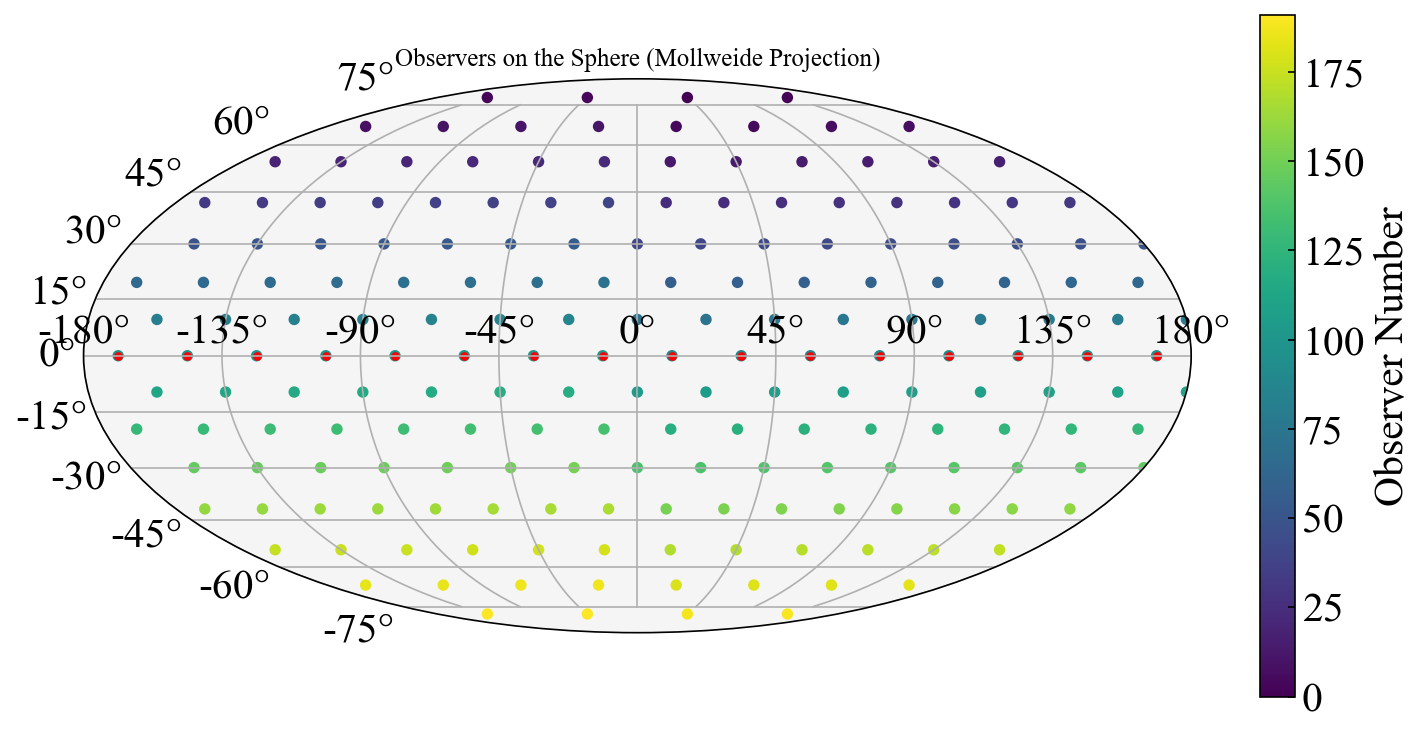

In [68]:
x, y, z = observers_xyz[:, 0], observers_xyz[:, 1], observers_xyz[:, 2]
r = np.sqrt(x**2 + y**2 + z**2)   # Radius (should be 1 for unit vectors)
theta = np.arctan2(y, x)          # Azimuthal angle in radians
phi = np.arccos(z / r)            # Elevation angle in radians
first_eq = 88
final_eq = 104

# Convert to latitude and longitude
longitude = theta                # Longitude (ranging from -π to π)
latitude = np.pi / 2 - phi 

# Plot in 2D using a Mollweide projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'mollweide'})

# Scatter plot
img = ax.scatter(longitude, latitude, s=20, c=np.arange(192))
ax.scatter(longitude[first_eq:final_eq], latitude[first_eq:final_eq], s=10, c='r')
plt.colorbar(img, ax=ax, label='Observer Number')
ax.set_title("Observers on the Sphere (Mollweide Projection)")
ax.grid(True)

# Adjust ticks for better readability
ax.set_xticks(np.radians(np.linspace(-180, 180, 9)))
ax.set_xticklabels(['-180°', '-135°', '-90°', '-45°', '0°', '45°', '90°', '135°', '180°'])

plt.tight_layout()
plt.show()


Load data

In [69]:
zslice = np.load(f'/Users/paolamartire/shocks/data/{folder}/slices/z0slice_{snap}.npy')
x_mid, y_mid, z_mid, dim_mid, den_mid, temp_mid, ie_den_mid, orb_en_den_mid, Rad_den_mid =\
        zslice[0], zslice[1], zslice[2], zslice[3], zslice[4], zslice[5], zslice[6], zslice[7], zslice[8]
    
dataph100 = np.loadtxt(f'{abspath}/data/R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}/100_photo{snap}.txt')
xph100, yph100, zph100 = dataph100[0], dataph100[1], dataph100[2]  
rph100 = np.sqrt(xph100**2 + yph100**2 + zph100**2)
dataph = np.loadtxt(f'{abspath}/data/R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}/_photo{snap}.txt')
xph, yph, zph = dataph[0], dataph[1], dataph[2]  
rph = np.sqrt(xph**2 + yph**2 + zph**2)
# dataphK = np.loadtxt(f'{abspath}/data/R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}/_photo{snap}Kextr.txt')
# xphK, yphK, zphK = dataphK[0], dataphK[1], dataphK[2]  
# rphK = np.sqrt(xphK**2 + yphK**2 + zphK**2)

Midplane 

In [70]:
xph100_eq, yph100_eq, zph100_eq = xph100[first_eq:final_eq], yph100[first_eq:final_eq], zph100[first_eq:final_eq]
rph100_eq = np.sqrt(xph100_eq**2 + yph100_eq**2 + zph100_eq**2)
xph_eq, yph_eq, zph_eq = xph[first_eq:final_eq], yph[first_eq:final_eq], zph[first_eq:final_eq]
rph_eq = np.sqrt(xph_eq**2 + yph_eq**2 + zph_eq**2)


Text(0.5, 0, 'observer number')

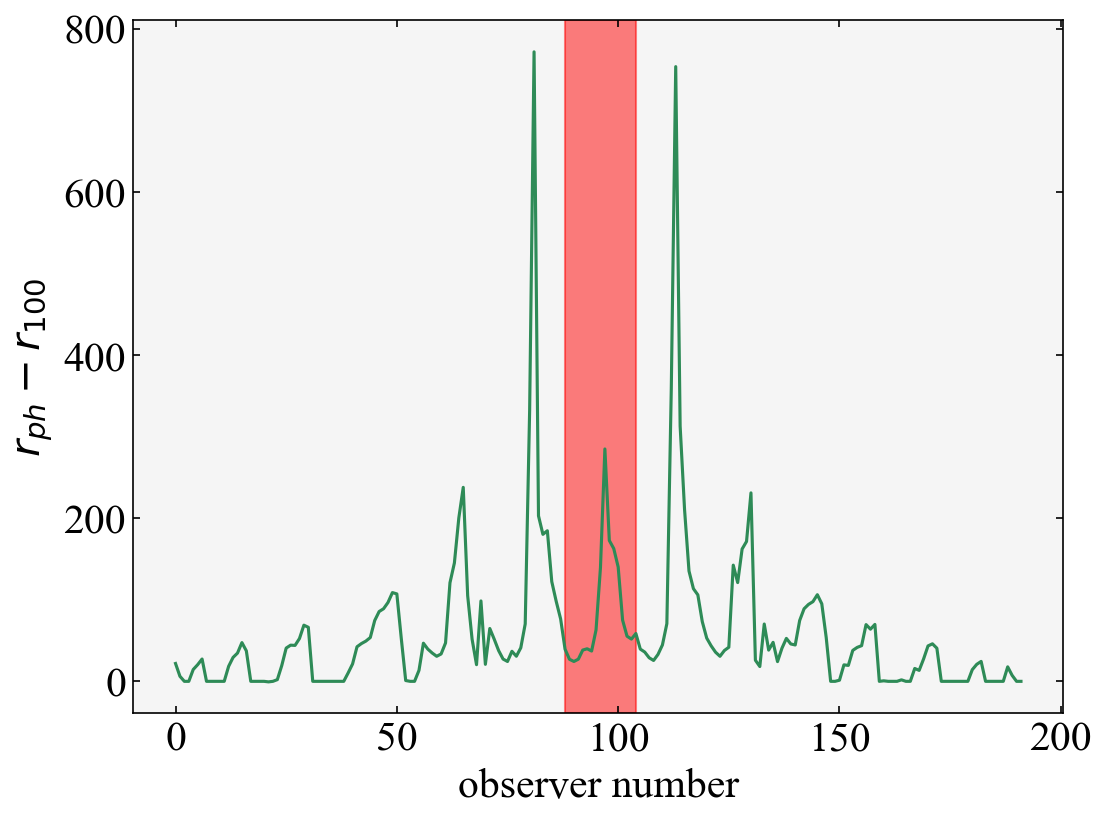

In [71]:
plt.plot(rph-rph100, c = 'seagreen')
plt.axvspan(first_eq, final_eq, alpha=0.5, color='red')
plt.ylabel(r'$r_{ph}-r_{100}$')
plt.xlabel('observer number')


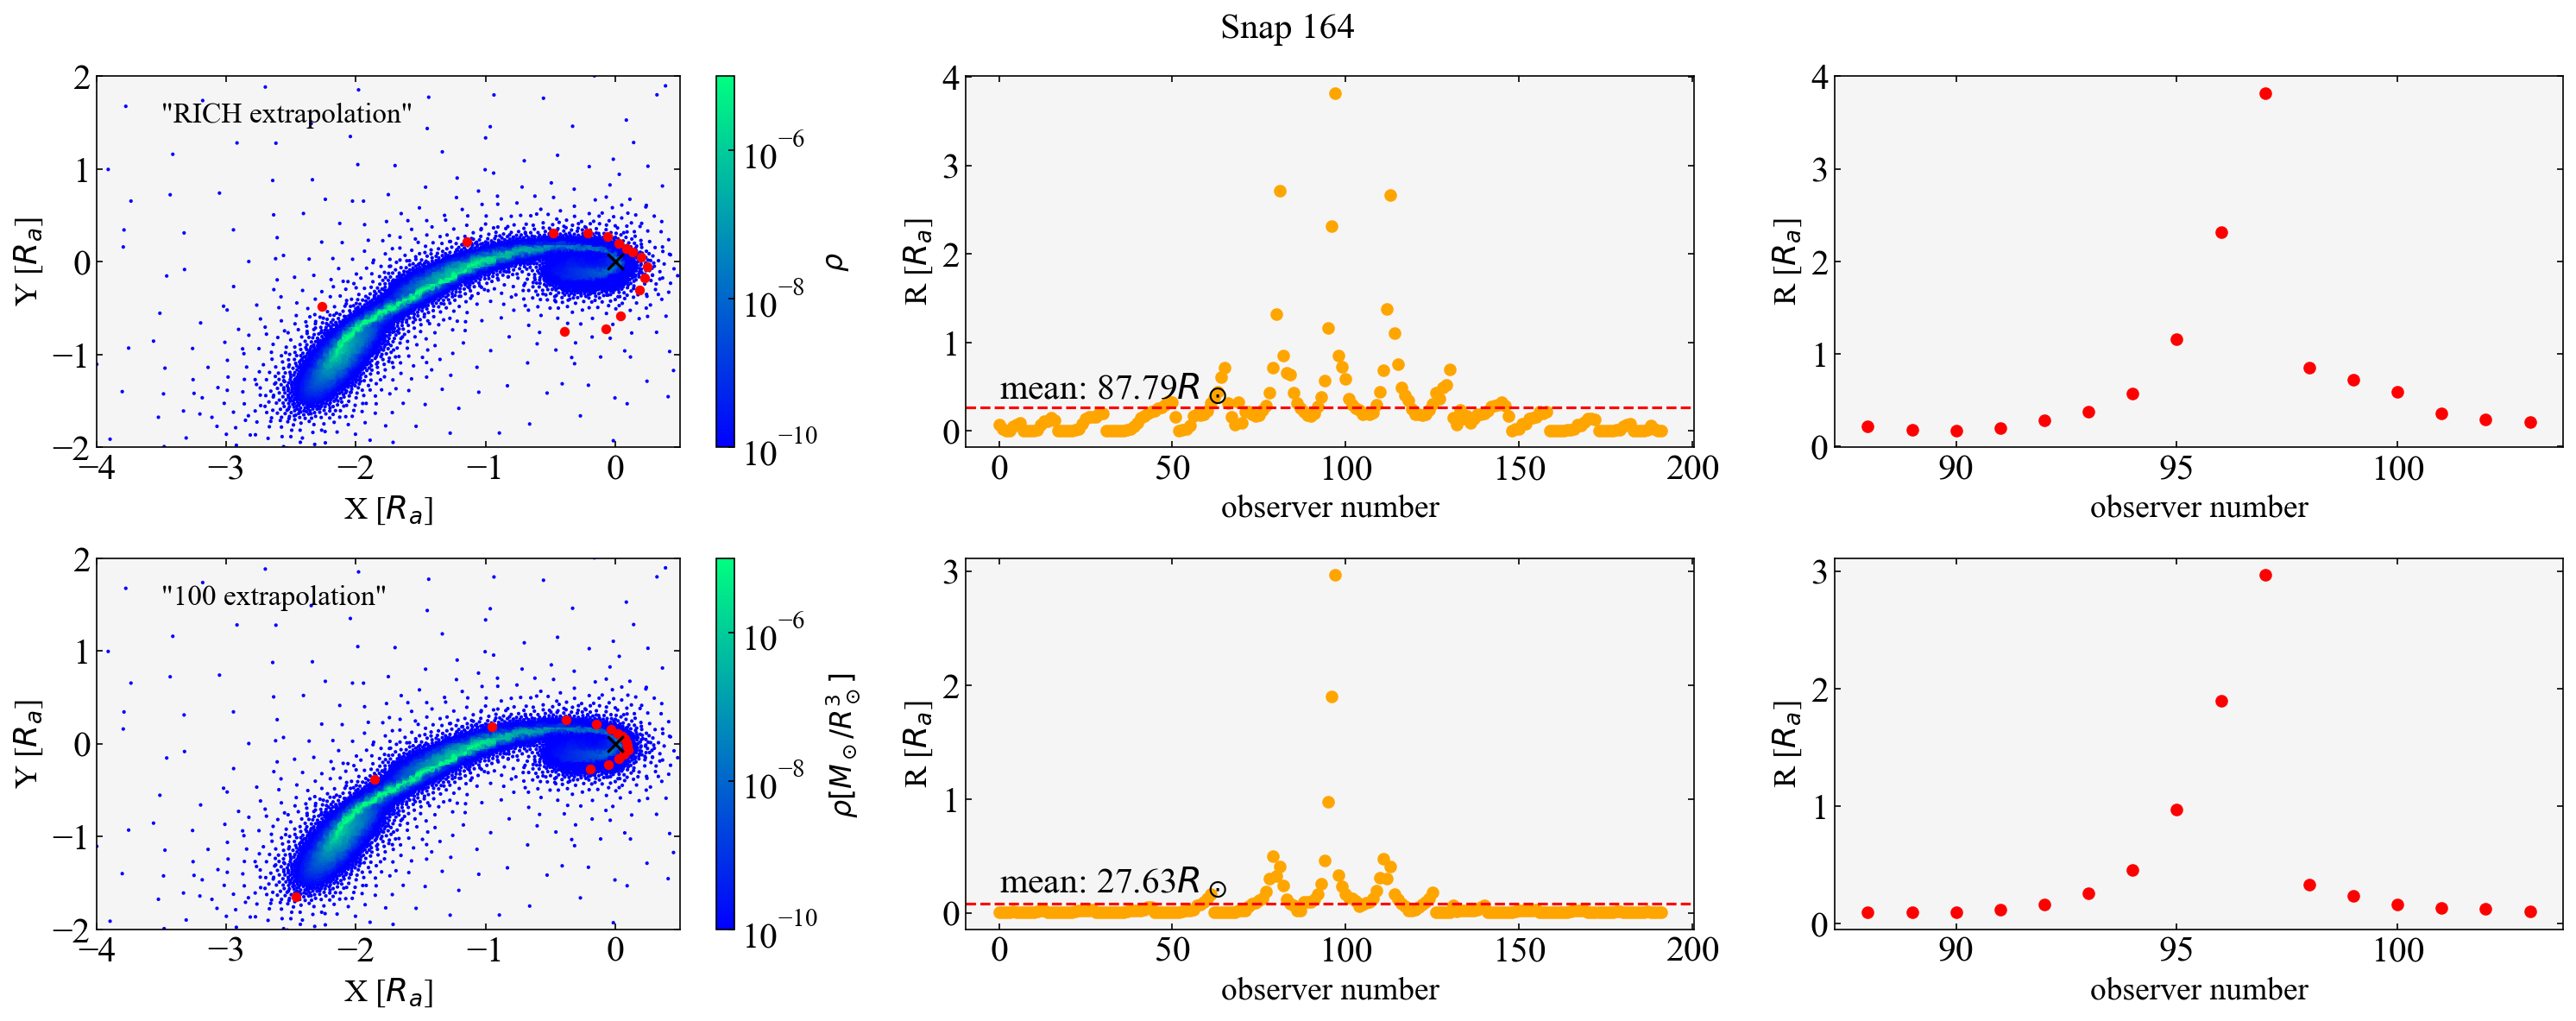

In [72]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (20,8))
img = ax1.scatter(x_mid/apo, y_mid/apo, c = den_mid, s = 1, cmap = 'winter', norm = colors.LogNorm(vmin = 1e-10, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ ', fontsize = 16)
ax1.scatter(xph_eq/apo, yph_eq/apo, c = 'r', s = 20)
ax1.scatter(0,0,c= 'k', marker = 'x', s=80)
ax1.set_xlim(-4,0.5)
ax1.set_ylim(-2,2)
ax1.set_xlabel(r'X [$R_a$]', fontsize = 18)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)
ax1.text(-3.5,1.5, '"RICH extrapolation"', fontsize = 16)

ax2.scatter(np.arange(192),rph/apo, c = 'orange')
ax2.set_ylabel(r'R [$R_a$]', fontsize = 18)
ax2.axhline(np.mean(rph/apo), c = 'r', ls = '--')
ax2.text(0, np.mean(rph/apo)+0.1, f'mean: {np.mean(rph):.2f}' + r'$R_\odot$', fontsize = 20)
ax2.set_xlabel('observer number', fontsize = 18)

ax3.scatter(np.arange(first_eq, final_eq),rph[first_eq:final_eq]/apo, c = 'r')
ax3.set_ylabel(r'R [$R_a$]', fontsize = 18)
ax3.set_xlabel('observer number', fontsize = 18)

img = ax4.scatter(x_mid/apo, y_mid/apo, c = den_mid, s = 1, cmap = 'winter', norm = colors.LogNorm(vmin = 1e-10, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho [M_\odot/R_\odot^3]$ ', fontsize = 16)
ax4.scatter(xph100_eq/apo, yph100_eq/apo, c = 'r', s = 20)
ax4.scatter(0,0,c= 'k', marker = 'x', s=80)
ax4.set_xlim(-4,0.5)
ax4.set_ylim(-2,2)
ax4.set_xlabel(r'X [$R_a$]', fontsize = 18)
ax4.set_ylabel(r'Y [$R_a$]', fontsize = 18)
ax4.text(-3.5,1.5, '"100 extrapolation"', fontsize = 16)

ax5.scatter(np.arange(192),rph100/apo, c = 'orange')
ax5.set_ylabel(r'R [$R_a$]', fontsize = 18)
ax5.axhline(np.mean(rph100/apo), c = 'r', ls = '--')
ax5.text(0, np.mean(rph100/apo)+0.1, f'mean: {np.mean(rph100):.2f}' + r'$R_\odot$', fontsize = 20)
ax5.set_xlabel('observer number', fontsize = 18)

ax6.scatter(np.arange(first_eq, final_eq),rph100[first_eq:final_eq]/apo, c = 'r')
ax6.set_ylabel(r'R [$R_a$]', fontsize = 18)
ax6.set_xlabel('observer number', fontsize = 18)

plt.suptitle(f'Snap {snap}', fontsize = 20)
plt.tight_layout()

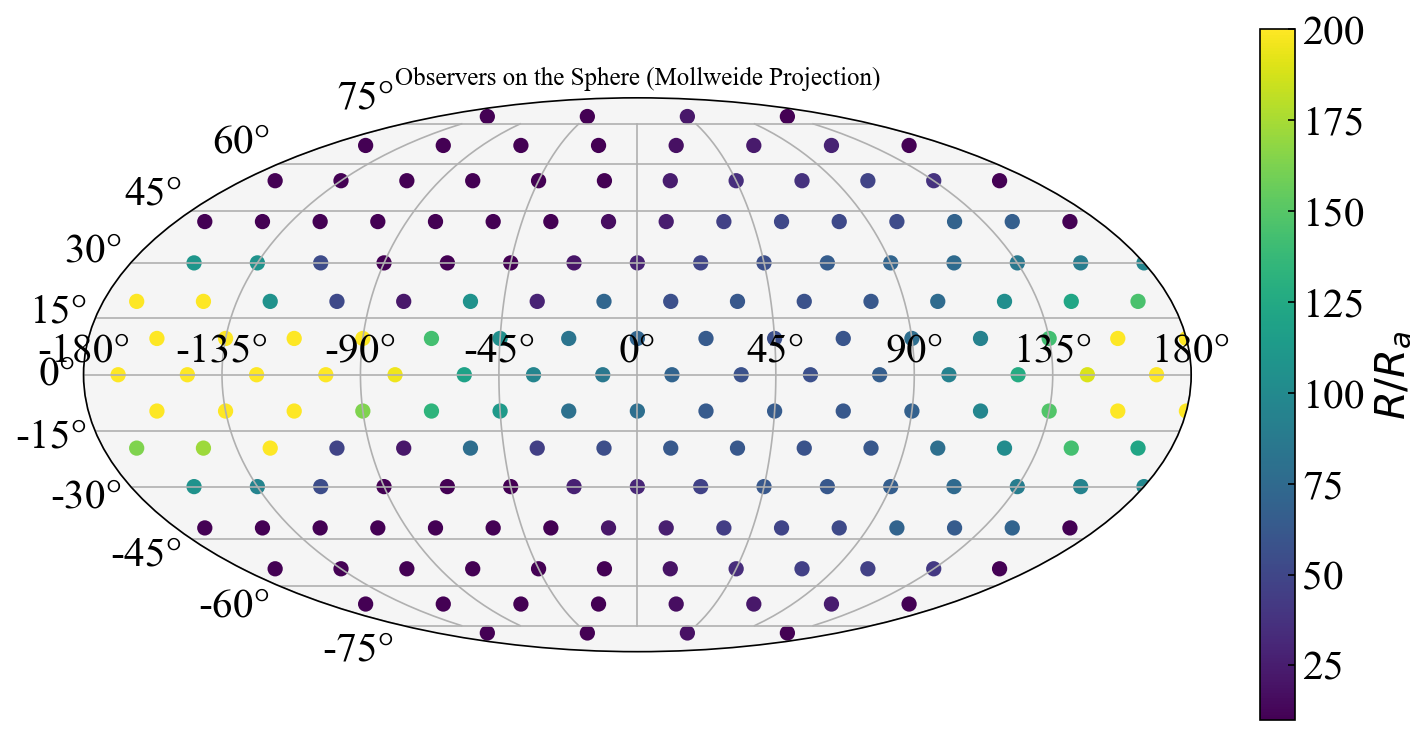

In [73]:
# Scatter plot
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'mollweide'})
img = ax.scatter(longitude, latitude, c=rph, s=40, vmin = 10, vmax = 200)
plt.colorbar(img, ax=ax, label=r'$R/R_a$')
ax.set_title("Observers on the Sphere (Mollweide Projection)")
ax.grid(True)

# Adjust ticks for better readability
ax.set_xticks(np.radians(np.linspace(-180, 180, 9)))
ax.set_xticklabels(['-180°', '-135°', '-90°', '-45°', '0°', '45°', '90°', '135°', '180°'])

plt.tight_layout()
plt.show()